<a href="https://colab.research.google.com/github/PedroDS4/Supervised_Machine_Learning/blob/main/MLP_Frequency_identification_implementation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##**Estimação de Frequência com MLP**
A estimativa de frequência por regressão linear pode não acompanhar tão bem a natureza dessa grandeza, uma vez que a frequência é não linear no tempo.
Para isso, precisamos então introduzir uma rede neural multicamadas, e introduzir uma função de ativação.

Seja $x(t) = sen(2 \pi f t) $ um sinal senoidal de frequência $f$, sua versão amostrada é dada por

$$
x[n] = x(nT_s) = sen(2 \pi f n T_s)
$$

e cada neurônio da primeira camada será dado por

$$
z_j = \sum_{i = 0}^{N} w_{i,j} x[i,l] + b_j
$$

e para cada neurônio da camada interna, temos

$$
v_j = \phi(z_j)
$$

usando a tangente hiperbólica, temos

$$
v_j = tanh(z_j)
$$

e assim, a saída da rede finalmente será

$$
f = \sum_{j = 0}^{K} a_{j} v_j + c
$$

para treinar os dados, precisaremos fazer então

$$
J(\mathbf{w}, \mathbf{a}) = || \mathbf{f} - \mathbf{V}(\mathbf{w})\mathbf{a}||_2^2
$$

ou em formato escalar

$$
J = \sum_{l = 0}^{M} (f_l - \hat{f_l})^2 = \sum_{l = 0}^{M} e_l ^2
$$

onde

$$
\hat{f_l} = \sum_{j = 0}^{K} a_{j} v_j + c = \sum_{j = 0}^{K} a_{j} \phi(\sum_{i = 0}^{N} w_{i,j} x[i,l] + b_j) + c
$$

derivando essa equação separadamente em relação a cada peso da camada interna, temos

$$
\frac{\partial J}{\partial a_j} = \frac{\partial J}{\partial e_l} \frac{\partial e_l}{\partial a_j} = -2 \sum_{l = 0}^{M} e_l v_j
$$

e agora em relação aos pesos da primeira camada

$$
\frac{\partial J}{\partial w_{i,j}} = \frac{\partial J}{\partial e_l} \frac{\partial e_l}{\partial v_j}  \frac{\partial v_j}{\partial z_j} \frac{\partial z_j}{\partial w_{i,j}}
$$

e as derivadas podem ser calculadas como

$$
\begin{cases}
\frac{\partial J}{\partial e_l} = 2 \sum_{l = 0}^{M} e_l \\
\frac{\partial e_l}{\partial v_j} = -a_j \\
\frac{\partial v_j}{\partial z_j} =  \frac{1}{cosh^2(z_j)} = 1 - tanh^2(z_j)\\
\frac{\partial z_j}{\partial w_{i,j}} = x[i,l]
\end{cases}
$$

então

$$
\frac{\partial J}{\partial w_{i,j}} = -2 \sum_{l = 0}^{M} e_l a_j x[i,l]( 1 - tanh^2(z_j))
$$

ainda substituindo $v_j = tanh(z_j)$, temos as formas finais dos gradientes como

$$
\begin{cases}
\frac{\partial J}{\partial w_{i,j}} = -2 \sum_{l = 0}^{M} e_l a_j x[i,l]( 1 - v_j^2) \\
\frac{\partial J}{\partial a_j} = -2 \sum_{l = 0}^{M} e_l v_j
\end{cases}
$$


assim, a atualização dos pesos no treinamento se torna

$$
\begin{cases}
w_{i,j}^{t+1} = w_{i,j}^{t} - \mu_w \frac{\partial J}{\partial w_{i,j}} \\
a_j^{t+1} = a_j^t - \mu_a \frac{\partial J}{\partial a_j}
\end{cases}
$$

onde $\mu_w$ e $\mu_a$ são as taxas de aprendizagem da rede.


Essa atualização pode ainda ser feita numa forma matricial, de modo que

$$
\begin{cases}
\mathbf{w}^{t+1} = \mathbf{w}^{t} - \mu_w \nabla_{\mathbf{w}}J(\mathbf{w}) \\
\mathbf{a}^{t+1} = \mathbf{a}^{t} - \mu_a \nabla_{\mathbf{a}}J(\mathbf{a})
\end{cases}
$$

onde os gradientes são, em forma matricial

$$
\begin{cases}
 \nabla_{\mathbf{w}}J(\mathbf{w}) =  -2 (\mathbf{1} - \mathbf{V}^2)_{K \times M} \times \mathbf{a}_{K \times 1} \times \mathbf{e}_{1 \times M} \cdot \mathbf{X}_{M \times N} \\
 \nabla_{\mathbf{a}}J(\mathbf{a}) = -2 \mathbf{V} \cdot \mathbf{e}
\end{cases}
$$

e $\cdot$ denota o produto matricial usual, já $\times$ denota um produto termo a termo.


In [ ]:
import numpy as np
import matplotlib.pyplot as plt




def MLP(x, W, a, N_layer):
    # Compute the output of the MLP network
    # x: Senoidal Signal of frequency f
    # W : each collum has the weights of each neurom of the intern layer
    # a : vector of the output layer weights
    # N_layer: number of neuroms of the intern layer
    # z = np.zeros((N_layer,1))

    # print(W.shape)
    # print(x.shape)
    z = (W@x.T)
    v = np.tanh(z)

    f = (np.real(a.T@v))
    f = np.floor(f)
    return f, v, z






def Train_MLP(X_data, f_data, N_layer, mu_w, mu_a, n_iter):
    # Train the MLP with stepest gradient algorithm
    # X_data: Dataset to train the network
    # f_data: Output Dataset Frequency
    # mu_w, mu_a: Learning rates
    # n_iter: Number of epoch

    N = X_data.shape[1]
    M = len(f_data)

    f = np.zeros(M)
    v = np.zeros((N_layer,M))
    z = np.zeros((N_layer,M))

    # W = np.random.rand(N_layer,N
    # W = np.ones((N_layer,N))
    # a = np.ones(N_layer)

    W = np.random.rand(N_layer,N)
    a = np.random.rand(N_layer)


    J = np.zeros(n_iter)

    for m in range(n_iter):

      # for i in range(M):
      #   f[i], v[:,i], z[:,i] = MLP(X_data[i,:], W, a, N_layer)
      f, v, z = MLP(X_data, W, a, N_layer)
      e = f_data - f
      J[m] = np.sum(np.abs(e)**2)

      delta = (1 - v**2) * a[:,None] * e[None,:]
      # print(v.shape)
      # delta = a@(1-v**2)*e

      dj_dW = -2 * (delta@X_data)

      dj_da = -2 * v @ e

      W = (W - mu_w*dj_dW)
      a = (a - mu_a*dj_da)

    return W, a, J




##**Gerando o dataset**

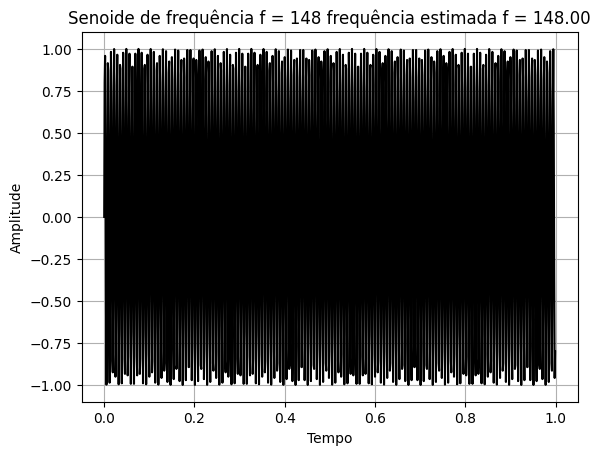

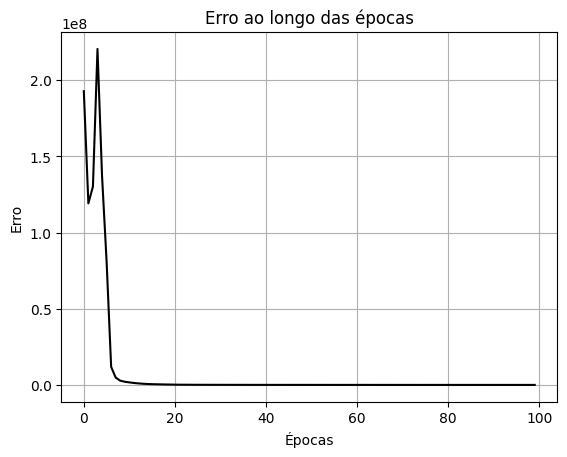

In [ ]:
from matplotlib import figure

#Número de senoides/frequencia
M = 10000

#Número de amostras no tempo
N = 1000

#Número de neurônios na camada oculta
K = 200


#Matriz de senoides(cada linha é uma senoide)
sen_matrix = np.zeros((M,N))


#Vetor de frequências verdadeiras
f = np.random.choice(np.arange(1,240),size = M)

T_s = 1e-3

t = np.arange(N)*T_s

for i in range(M):
  # theta = np.random.uniform(0, 2*np.pi)
  # theta = np.pi
  theta = 0
  sen_matrix[i,:] = np.sin(2*np.pi*f[i]*t + theta)


mu_w = 0.00008/10
mu_a = 0.00008/10
n_epochs = 100


W, a, J = Train_MLP(sen_matrix, f, K, mu_w, mu_a, n_epochs)
# w = np.linalg.inv(sen_matrix.T@sen_matrix)@sen_matrix.T@f
# w = np.linalg.pinv(sen_matrix)@f


sen = sen_matrix[1,:]

freq = MLP(sen, W, a, K)[0]

figure = plt.figure()
plt.plot(t,sen,'black')
plt.xlabel('Tempo')
plt.ylabel('Amplitude')
plt.title(f'Senoide de frequência f = {f[1]} frequência estimada f = {freq:.2f}')
plt.grid()


figure = plt.figure()
plt.plot(J,'black')
plt.xlabel('Épocas')
plt.ylabel('Erro')
plt.title('Erro ao longo das épocas')
plt.grid()


##**Validando**

Frequência estimada: 130.0


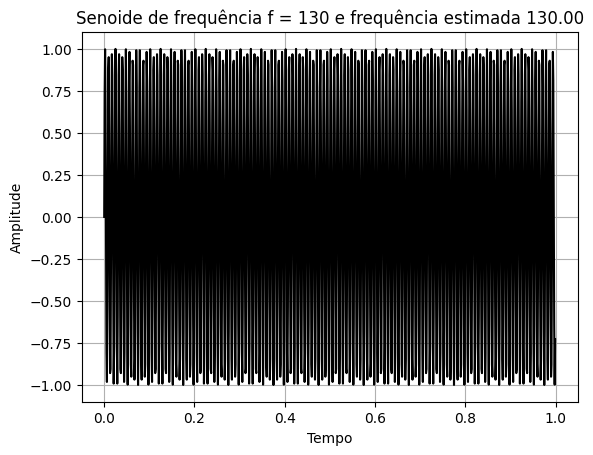

In [ ]:

f = 130
sen_test = np.sin(2*np.pi*f*t)

# f_est = w.T@sen_test
f_est = MLP(sen_test, W, a, K)[0]

print(f'Frequência estimada: {f_est}')

plt.plot(t,sen_test,'black')
plt.xlabel('Tempo')
plt.ylabel('Amplitude')
plt.title(f'Senoide de frequência f = {f} e frequência estimada {f_est:.2f}')
plt.grid()


##**Frequência Estimada Versus Real**

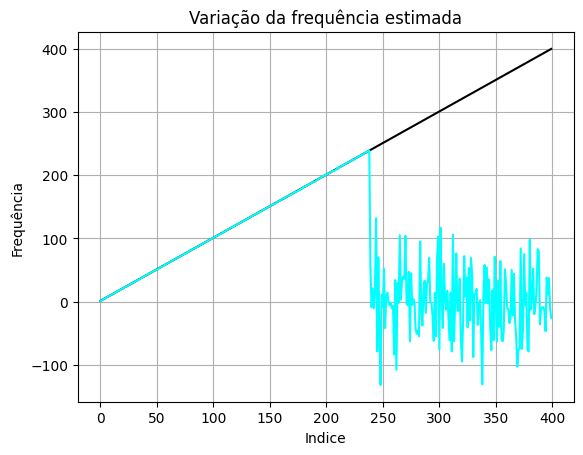

In [ ]:
M = 400
test_freqs = np.linspace(1,M,M)

test_senoides = np.zeros((M, N))

for i in range(M):
  test_senoides[i,:] = np.sin(2*np.pi*test_freqs[i]*t)


f_est = MLP(test_senoides, W, a, K)[0]



plt.plot(test_freqs,'black', label = 'Frequência Real')
plt.plot(f_est,'cyan', label = 'Frequência Estimada')
plt.xlabel('Indice')
plt.ylabel('Frequência')
plt.title('Variação da frequência estimada')
plt.grid()

##**Treinamento com Transformada de fourier**

Treinar a rede com o sinal em tempo discreto, para a maioria dos casos, funcionou bem, porém é percpetível que, o treinamento no domínio do tempo depende da periodicidade do sinal, e pode ser afetada dependendo da frequência e fase.
Para uma abordagem mais robusta, podemos alimentar a rede não com o sinal em tempo discreto, e sim com seu espectro, considerando uma taxa de amostragem e número de amostras fixas, vamos usar primeiramente uma abordagem de regressão linear, e observar a robustez do resultado.

##**Estimação de Frequência de Senoides**
Seja $x(t) = sen(2 \pi f t) $ um sinal senoidal de frequência $f$, sua versão amostrada é dada por

$$
x[n] = x(nT_s) = sen(2 \pi f n T_s)
$$

a partir desse sinal, como podemos identificar a frequência utilizando redes neurais?

Se a entrada da rede são as amostras, temos que, a saída será dada por

$$
z = \sum_{i = 0}^{N} w_i X[i] + b
$$

onde

$$
X[i] = DFT\{\ x[n] \}\
$$

considerando uma senoide de $N$ amostras, e então podemos treinar a rede para minimizar o erro

$$
J(\mathbf{w}) = ||\mathbf{f} - \mathbf{X}\mathbf{w}||_2^2  
$$

O ponto de mínimo desas função objetivo é

$$
\mathbf{w}^* = (\mathbf{X}^T \mathbf{X})^{-1} \mathbf{X}^T \mathbf{f}
$$



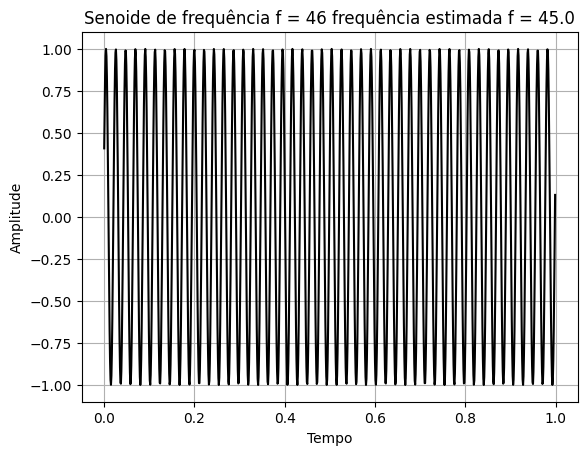

In [ ]:
import numpy as np
import matplotlib.pyplot as plt


#Número de senoides/frequencia
M = 100000

#Número de amostras no tempo
N = 1000

#Matriz de senoides(cada linha é uma senoide)
sen_matrix = np.zeros((M,N))
X_spec = np.zeros((M,N))

#Vetor de frequências verdadeiras
f = np.random.choice(np.arange(1,240),size = M)

T_s = 1e-3

t = np.arange(N)*T_s

for i in range(M):
  theta = np.random.uniform(0, np.pi/6)
  # theta = 0
  sen_matrix[i,:] = (np.sin(2*np.pi*f[i]*t + theta))


X_spec = np.fft.fft(sen_matrix, axis = 1)


# w = np.linalg.inv(sen_matrix.T@sen_matrix)@sen_matrix.T@f
w = np.linalg.pinv(X_spec)@f

sen = sen_matrix[1,:]

freq = np.real(w.T@np.fft.fft(sen))

freq = np.floor(freq)

plt.plot(t, sen,'black')
plt.xlabel('Tempo')
plt.ylabel('Amplitude')
plt.title(f'Senoide de frequência f = {f[1]} frequência estimada f = {freq}')
plt.grid()




Frequência estimada: 96.0


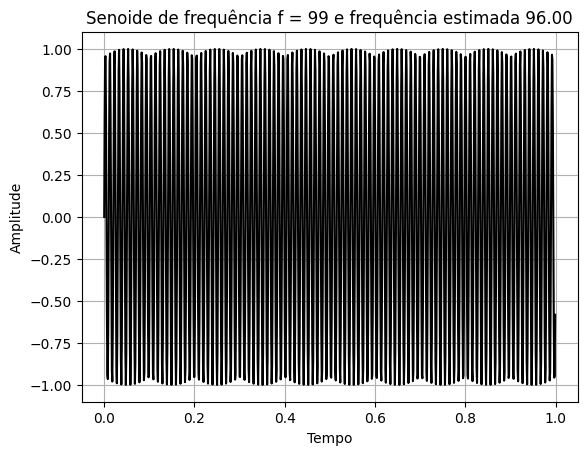

In [ ]:

f = 99
sen_test = np.sin(2*np.pi*f*t)

f_est = np.real(w.T@np.fft.fft(sen_test))
f_est = np.floor(f_est)

print(f'Frequência estimada: {f_est}')

plt.plot(t,sen_test,'black')
plt.xlabel('Tempo')
plt.ylabel('Amplitude')
plt.title(f'Senoide de frequência f = {f} e frequência estimada {f_est:.2f}')
plt.grid()


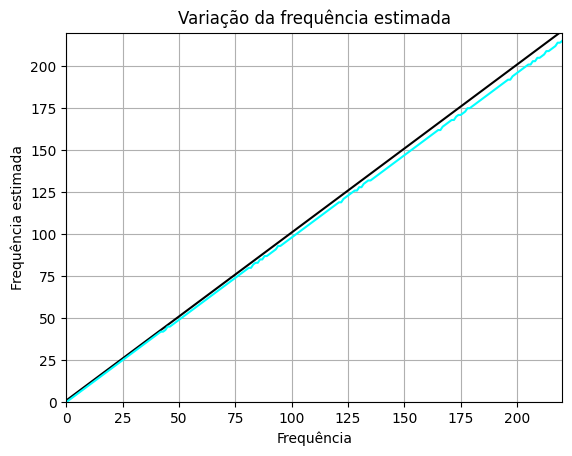

In [ ]:
test_freqs = np.linspace(1,300,300)

test_senoides = np.zeros((300,1000))

for i in range(300):
  test_senoides[i,:] = np.sin(2*np.pi*test_freqs[i]*t)


f_est = np.real(np.fft.fft(test_senoides)@w)
f_est = np.floor(f_est)


plt.plot(test_freqs,'black')
plt.plot(f_est,'cyan')
plt.xlim([0,220])
plt.ylim([0,220])
plt.xlabel('Frequência')
plt.ylabel('Frequência estimada')
plt.title('Variação da frequência estimada')
plt.grid()